# Millenials and Investment: an Ongoing Exploration

In case you haven't heard, [millenials are killing everything](http://www.businessinsider.com/millennials-are-killing-list-2017-8/#diamonds-12) from diamonds to department stores to designer crap to grocery chains.

Why? Sure, the recession had an impact. But also, millenials pay more attention to ethics than many multinational corporations bargain for. They cite the blood diamond trade as a major reason to spring for non-traditional engagement rings. They opt for grocery providers that can tell them where their food is coming from and under what conditions it was produced. They're ditching the fast fashion industry for higher-priced items purchased secondhand on sites like Poshmark and ThreadUp. 

And as millenials reach the age where they might accrue some savings, it makes sense that they would care about where that is going, too. In addition to millenial attendance at the NoDAPL protests, we saw thousands of millenials divest from Western Union, Bank of America, and other banks that loaned money to the project. Maybe megacorps won't change their tunes because a few thousand people stood in a field to get mowed down by water cannons, but they're more likely to sit up and listen when those same people take their hard-earned doll hairs to another playhouse.

So we see that millenials are surveying their options to spend and save according to their values. What about investing? Any personal finance 101 that isn't taught by a financial advisor will recommend a low cost index as the place to stick extra money so it can grow with the market. Most index funds, including the most recommended one (Vanguard), decide their investments via index-matching: matching their holdings to the S&P500 by market cap, with no other variables. Thing is, plenty of investors are expressing interest in taking ethical considerations into account. Some portfolios do this by blanket blocking investments in certain industries like tobacco or porn. Other more advanced optsions, like Betterment's AutoSRI portfolio, use actual ESG data to determine where they invest the money. There isn't (yet) a fully customizable option to allow folks to automatically invest their funds based on a checklist of their individual values. For a while, I've thought about building a toy version of what that might look like. 

When I talk about the idea with friends and relatives, I get the following objection: 'What about the returns?' Touche. Nobody wants to lose out on their potential earnings. At first, I figured I'd build a tolerance into the system that allowed investors to say 'These are my values, but please don't invest in a way that will trail general market performance by more than x percent.' The algorithm would then predict stock performance for each company, somehow blend that with ESG rating, and come up with a combined weight for divvying up investment money.

Before I build that, though, I need to test the assumption that high ESG ratings *do* correlate negatively with returns. If they don't, there's no need for the tolerance measure in the first place.

I'm not the first person to run correlations along these lines. Dorfleitner, Utz, and Wimmer published a paper on this just last year. [Their analysis](http://www.tandfonline.com/doi/full/10.1080/20430795.2017.1403272?scroll=top&needAccess=true) suggests that higher corporate social responsibility ratings *increase* returns over a long period of time ("long" being a 12 year period from 2002-2014). They even identify three specific areas that correlate with higher than average returns: emission and resource reduction, workforce, and society. So in my exploration, I'll dig into some specific CSR breakdowns with the data I have on S&P 500 companies. 

In [1]:
import pandas as pd

## Correlating KLD ESG Ratings to Stock Performance, 1991-1999

Let's determine whether we notice any correlation between companies' environmental, social, and governmental ratings and their stock performance during the 1990s. 

### First, we pull in the ESG data. 

These come from KLD and are now distributed by MSGI. I pulled them from an academic database. Don't rerun this notebook because I didn't push the actual data to Github. 

In [2]:
y91 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1991 HistoricalSpreadsheet_STATS.xls')
y92 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1992 HistoricalSpreadsheet_STATS.xls')
y93 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1993 HistoricalSpreadsheet_STATS.xls')
y94 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1994 HistoricalSpreadsheet_STATS.xls')
y95 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1995 HistoricalSpreadsheet_STATS.xls')
y96 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1996 HistoricalSpreadsheet_STATS.xls')
y97 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1997 HistoricalSpreadsheet_STATS.xls')
y98 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1998 HistoricalSpreadsheet_STATS.xls')
y99 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1999 HistoricalSpreadsheet_STATS.xls')

nineties = [y91, y92, y93, y94, y95, y96, y97, y98, y99]

In [3]:
y00 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2000 HistoricalSpreadsheet_STATS.xls')
y01 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2001 HistoricalSpreadsheet_STATS.xls')
y02 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2002 HistoricalSpreadsheet_STATS.xls')
y03 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2003 HistoricalSpreadsheet_STATS.xls')
y04 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2004 HistoricalSpreadsheet_STATS.xls')
y05 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2005 Historical Spreadsheet_STATS.xls') #wth KLD
y06 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2006 Historical Spreadsheet_STATS.xls')
y07 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2007 HistoricalSpreadsheet_STATS.xls')
y08 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2008 HistoricalSpreadsheet_STATS.xls')
y09 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2009 HistoricalSpreadsheet_STATS.xls')


two_thousands = [y00, y01, y02, y03, y04]
#might not have the sp500 column. Need to check

In [4]:
twenty_years = nineties + two_thousands

def filter_500(df):
    return df[df['SP500'] == True]

sp500_90s = []    
for data in twenty_years:
  sp500_90s.append(filter_500(data))

aggregate_data = pd.concat(sp500_90s)
aggregate_data['EMP-str-sum'] = aggregate_data[['EMP-str-A','EMP-str-B','EMP-str-C','EMP-str-D','EMP-str-F','EMP-str-G']].sum(axis=1)
aggregate_data['EMP-con-sum'] = aggregate_data[['EMP-con-A','EMP-con-B','EMP-con-C','EMP-con-D']].sum(axis=1)
aggregate_data['ENV-str-sum'] = aggregate_data[['ENV-str-A','ENV-str-B','ENV-str-C','ENV-str-D','ENV-str-F','ENV-str-G']].sum(axis=1)
aggregate_data['ENV-con-sum'] = aggregate_data[['ENV-con-A','ENV-con-B','ENV-con-C','ENV-con-D','ENV-con-E','ENV-con-F']].sum(axis=1)
aggregate_data.head()

,ALC-con-#,ALC-con-A,ALC-con-X,BMS,CGOV-con-#,CGOV-con-B,CGOV-con-F,CGOV-con-G,CGOV-con-H,CGOV-con-I,...,Russell2000,SP500,TOB-con-#,TOB-con-A,TOB-con-X,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum
0,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,ABT,0,0,0,1
1,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AMT,0,0,0,0
3,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AMD,1,0,0,1
4,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AET,1,0,0,0
6,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AHM,0,0,0,0


In [5]:
def sum_scores_for(dataframe, esg_marker):
    grouping = dataframe.groupby(['Ticker'])[esg_marker].sum()
    return pd.DataFrame({esg_marker : grouping}).reset_index()

In [6]:
esg_marker_data = sum_scores_for(aggregate_data, 'EMP-str-sum')
esg_marker_data.head()

,Ticker,EMP-str-sum
0,A,6
1,AA,19
2,AAL,1
3,AAPL,7
4,ABC,0


In [7]:
esg_marker_data['EMP-con-sum'] = sum_scores_for(aggregate_data, 'EMP-con-sum')['EMP-con-sum']
esg_marker_data['ENV-str-sum'] = sum_scores_for(aggregate_data, 'ENV-str-sum')['ENV-str-sum']
esg_marker_data['ENV-con-sum'] = sum_scores_for(aggregate_data, 'ENV-con-sum')['ENV-con-sum']

In [8]:
esg_marker_data.sort_values(by=['EMP-con-sum'], ascending=False).head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum
150,CAT,16,23,1,10
847,UNP,4,18,2,28
649,PD,0,17,0,26
501,LPX,1,17,3,17
443,IP,0,16,15,36


### Second, we pull in stock performance data.

This data contains stock returns by quarter for S&P500 companies dating back to 1979. We'll pull the columns for the '90s for now.

In [9]:
price_data = pd.read_excel('../stockproject/Cleaned_Researcher_Dataset.xlsx')

In [10]:
new_header = price_data.iloc[0] #grab the first row for the header
content = price_data[1:] #take the data less the header row
content.columns = new_header #set the header row as the df header
content.head()

tickers = content.iloc[:,0:2]
tickers.columns = list(new_header)[0:2]

dates = content.iloc[:,45:106]
dates.columns = list(new_header)[45:106]

result = pd.concat([tickers, dates], axis=1)
result.head()

,Ticker,Company Name,1989-12-31 00:00:00,1990-03-31 00:00:00,1990-06-30 00:00:00,1990-09-30 00:00:00,1990-12-31 00:00:00,1991-03-31 00:00:00,1991-06-30 00:00:00,1991-09-30 00:00:00,...,2002-09-30 00:00:00,2002-12-31 00:00:00,2003-03-31 00:00:00,2003-06-30 00:00:00,2003-09-30 00:00:00,2003-12-31 00:00:00,2004-03-31 00:00:00,2004-06-30 00:00:00,2004-09-30 00:00:00,2004-12-31 00:00:00
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.06,17.96,13.15,19.55,22.11,29.24,31.63,29.28,21.57,24.1
2,AA,Alcoa Inc,75,64.75,63.75,62.63,57.63,65.5,67.5,63.88,...,19.3,22.78,19.38,25.5,26.16,38,34.69,33.03,33.59,31.42
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAL (Alex),Alexander & Alexander,30.63,26.75,24.38,17.88,23.13,26.25,22.5,20.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Third, we translate these stock prices into returns.

In [97]:
def quarter_return(start, end):
    if start == 0 or end == 0:
        return 0
    return end / start

raw_stock_prices = result
returns_df = raw_stock_prices[['Ticker', 'Company Name']]
for column_name in raw_stock_prices.iloc[:,2:]:
    loc = raw_stock_prices.columns.get_loc(column_name)
    this_column = raw_stock_prices.iloc[:,loc]
    next_col = loc + 1
    try:
        next_column = raw_stock_prices.iloc[:, next_col]

        temp_df = pd.concat([this_column, next_column], axis=1)
        temp_df.columns = ['a', 'b']
    
        returns_df['quarter_starting_' + column_name.strftime('%m/%d/%Y') + '_roi'] = (
        temp_df.apply(lambda row: quarter_return(row['a'], row['b']), axis=1))
    except:
        print('End of dataframe reached')

returns_df.head()

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


End of dataframe reached


,Ticker,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,quarter_starting_12/31/1990_roi,quarter_starting_03/31/1991_roi,quarter_starting_06/30/1991_roi,quarter_starting_09/30/1991_roi,...,quarter_starting_06/30/2002_roi,quarter_starting_09/30/2002_roi,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.552220,1.375191,0.732183,1.486692,1.130946,1.322479,1.081737,0.925703,0.736680,1.117293
2,AA,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,1.136561,1.030534,0.94637,1.007827,...,0.582202,1.180311,0.850746,1.315789,1.025882,1.452599,0.912895,0.952148,1.016954,0.935397
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAL (Alex),Alexander & Alexander,0.873327,0.911402,0.733388,1.293624,1.134890,0.857143,0.92800,0.981801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Third, we combine the data into one dataframe.

We find all the companies for which we have both stock price data and ESG data, and we put the information together.

In [98]:
tickers = list(esg_marker_data["Ticker"]) #get all the company tickers for which we have esg data
prices_for_esg_companies = returns_df[returns_df["Ticker"].isin(tickers)] #get the stock data from companies in that list
prices_for_esg_companies.shape

(751, 62)

In [117]:
relevant_esgs = esg_marker_data[esg_marker_data["Ticker"].isin(list(prices_for_esg_companies["Ticker"]))]
relevant_esgs = relevant_esgs.fillna(0.0) #no esg score to zero esg score

In [118]:
all_data = pd.concat([relevant_esgs, prices_for_esg_companies.iloc[:,1:]], axis = 1) #put the esg and stock data in one dataframe

In [122]:
all_data.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_06/30/2002_roi,quarter_starting_09/30/2002_roi,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi
0,A,6.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,19.0,0.0,15.0,37.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,0.552220,1.375191,0.732183,1.486692,1.130946,1.322479,1.081737,0.925703,0.736680,1.117293
2,AAL,1.0,0.0,0.0,0.0,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,...,0.582202,1.180311,0.850746,1.315789,1.025882,1.452599,0.912895,0.952148,1.016954,0.935397
3,AAPL,7.0,7.0,2.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's pick a category to start with. Why CEO (DIV-str-A)? 

According to the KLD documentation, this category indicates if The company's chief executive officer is a woman or a member of a minority group.

I'll comment briefly on a trend in this data. In 1991, when recordings begin, there is only one S&P500 company (out of 500)with a not-white-dude CEO. By 1999, we're up to a still-abysmal-but-better number at 20. 

In [123]:
import matplotlib.pyplot as plt
import random
%matplotlib inline  

In [124]:
import holoviews as hv
import seaborn as sns

In [135]:
# NOW we need to calculate average roi
returns = all_data[all_data.columns.difference(['EMP-str-sum', 'EMP-con-sum','ENV-str-sum','ENV-con-sum','Ticker','Company Name'])]
all_data['avg_quarterly_roi'] = returns.mean(axis=1, skipna=True)
all_data.head(10)

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_roi,avg_quarterly_roi
0,A,6.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,19.0,0.0,15.0,37.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,0.732183,1.486692,1.130946,1.322479,1.081737,0.925703,0.736680,1.117293,0.990271,0.990271
2,AAL,1.0,0.0,0.0,0.0,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,...,0.850746,1.315789,1.025882,1.452599,0.912895,0.952148,1.016954,0.935397,1.007726,1.007726
3,AAPL,7.0,7.0,2.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABI,11.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ABK,6.0,0.0,0.0,0.0,Apple Inc.,1.141844,1.111801,0.648045,1.482759,...,0.986741,1.347949,1.087093,1.031371,1.265325,1.203402,1.190842,1.661935,1.060814,1.060814
7,ABS,9.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ABT,0.0,0.0,0.0,19.0,AmerisourceBergen Corp.,NaN,NaN,NaN,NaN,...,0.966673,1.320952,0.779380,1.038853,0.973820,1.093270,0.898461,1.092534,0.995946,0.995946
9,ABX,4.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


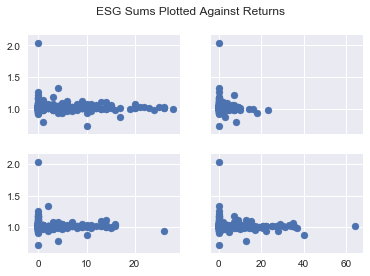

In [136]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('ESG Sums Plotted Against Returns')
ax1.scatter(x=all_data['EMP-str-sum'], y=all_data['avg_quarterly_roi'])
ax2.scatter(x=all_data['EMP-con-sum'], y=all_data['avg_quarterly_roi'])
ax3.scatter(x=all_data['ENV-str-sum'], y=all_data['avg_quarterly_roi'])
ax4.scatter(x=all_data['ENV-con-sum'], y=all_data['avg_quarterly_roi'])

I've run this a few times and I know we have 40 examples where EMP-str-sum is 40, 8 where it's 1, etc. The samples overrepresent low numbers for the EMP-str-sum, so to even that out, we'll use a sample of twenty cases where EMP-str-sum is 0.0 in our grouping. We'll do another step to even out this discrepancy before we analyze the data.

In [131]:
esg_sum_zero = all_data[all_data['EMP-str-sum'] == 0.0]
twenty_examples = esg_sum_zero.sample(20)

esg_sum_above_zero = all_data[all_data['EMP-str-sum'] > 0.0]

emp_str_sum = pd.concat([esg_sum_above_zero, twenty_examples])

Here's our second step for resolving the fact that we have way more samples at the small end of the EMP-str-sum axis than at the top: We'll stick them in buckets so each bucket has roughly the same number of samples. 

In [132]:
def buckets(score):
    if score == 0.0:
        val = '0' 
    if 0.0 < score < 4.0:
        val = '1-3' 
    if 3.0 < score < 9.0:
        val = '4-8'
    if 8.0 < score:
        val = '9 and up' 
    return val

emp_str_sum['emp_str_sum_grouping'] = emp_str_sum['EMP-str-sum'].apply(buckets)
emp_str_sum.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_roi,emp_str_sum_grouping
0,A,6.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-8
1,AA,19.0,0.0,15.0,37.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,0.732183,1.486692,1.130946,1.322479,1.081737,0.925703,0.736680,1.117293,0.990271,9 and up
2,AAL,1.0,0.0,0.0,0.0,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,...,0.850746,1.315789,1.025882,1.452599,0.912895,0.952148,1.016954,0.935397,1.007726,1-3
3,AAPL,7.0,7.0,2.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-8
5,ABI,11.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9 and up


In [133]:
grouping = emp_str_sum.groupby(['emp_str_sum_grouping'])[['avg_quarterly_roi']].describe()
grouping

avg_roi
emp_str_sum_grouping                 
0                    count  10.000000
                     mean    1.014417
                     std     0.034723
                     min     0.940629
                     25%     0.995920
                     50%     1.023590
                     75%     1.041004
                     max     1.056123
1-3                  count  80.000000
                     mean    1.019123
                     std     0.042612
                     min     0.781262
                     25%     1.007856
                     50%     1.016773
                     75%     1.026430
                     max     1.177156
4-8                  count  76.000000
                     mean    1.021734
                     std     0.045715
                     min     0.935556
                     25%     1.003833
                     50%     1.016714
                     75%     1.028139
                     max     1.329562
9 and up             count  56.000000
                     mean    1.013320
                     std     0.054617
                     min     0.720171
                     25%     1.003980
                     50%     1.015748
                     75%     1.028429
                     max     1.117888

In [28]:
esg_sum_zero = all_data[all_data['EMP-con-sum'] == 0.0]
eighteen_examples = esg_sum_zero.sample(18)

esg_sum_above_zero = all_data[all_data['EMP-con-sum'] > 0.0]

emp_con_sum = pd.concat([esg_sum_above_zero, eighteen_examples])

def buckets(score):
    if score == 0.0:
        val = '0' 
    if 0.0 < score < 3.0:
        val = '1-2' 
    if 2.0 < score < 5.0:
        val = '3-4'
    if 4.0 < score:
        val = '5 and up'
    return val

emp_con_sum['emp_con_sum_grouping'] = emp_con_sum['EMP-con-sum'].apply(buckets)
emp_con_sum.head()

,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,start_stock_prices,end_stock_prices,returns,emp_con_sum_grouping
20,0.0,9.0,0.0,13.0,13.0,23.81,1.831538,5 and up
39,7.0,5.0,11.0,21.0,21.0,56.13,2.672857,5 and up
56,6.0,4.0,12.0,21.0,21.0,23.81,1.133810,3-4
68,0.0,3.0,8.0,14.0,14.0,61.38,4.384286,3-4
88,21.0,9.0,3.0,28.0,28.0,49.75,1.776786,5 and up


In [29]:
grouping = emp_con_sum.groupby(['emp_con_sum_grouping'])[['returns']].describe()
grouping

returns
emp_con_sum_grouping                 
0                    count  18.000000
                     mean   12.365720
                     std    10.982564
                     min     1.253750
                     25%     4.479423
                     50%     7.173125
                     75%    16.870208
                     max    37.310000
1-2                  count  18.000000
                     mean   12.815850
                     std    14.532613
                     min     0.500000
                     25%     2.745833
                     50%     5.420833
                     75%    20.342500
                     max    41.250000
3-4                  count  16.000000
                     mean    7.422713
                     std     8.877436
                     min     1.133810
                     25%     2.725000
                     50%     4.666667
                     75%     8.933571
                     max    37.875000
5 and up             count  18.000000
                     mean    8.377149
                     std    13.645871
                     min     0.647059
                     25%     1.625596
                     50%     3.042727
                     75%     8.384500
                     max    58.750000

In [30]:
esg_sum_zero = all_data[all_data['ENV-str-sum'] == 0.0]
twenty_examples = esg_sum_zero.sample(20)

esg_sum_above_zero = all_data[all_data['ENV-str-sum'] > 0.0]

env_str_sum = pd.concat([esg_sum_above_zero, twenty_examples])

def buckets(score):
    if score == 0.0:
        val = '0' 
    if 0.0 < score < 4.0:
        val = '1-3' 
    if 3.0 < score < 10.0:
        val = '4-9'
    if 9.0 < score:
        val = '9 and up'
    return val

env_str_sum['env_str_sum_grouping'] = env_str_sum['ENV-str-sum'].apply(buckets)
env_str_sum.head()

,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,start_stock_prices,end_stock_prices,returns,env_str_sum_grouping
25,1.0,0.0,2.0,21.0,21.0,80.50,3.833333,1-3
26,6.0,0.0,3.0,6.0,6.0,10.31,1.718333,1-3
39,7.0,5.0,11.0,21.0,21.0,56.13,2.672857,9 and up
56,6.0,4.0,12.0,21.0,21.0,23.81,1.133810,9 and up
62,15.0,0.0,7.0,4.0,4.0,94.25,23.562500,4-9


In [31]:
grouping = env_str_sum.groupby(['env_str_sum_grouping'])[['returns']].describe()
grouping

returns
env_str_sum_grouping                 
0                    count  20.000000
                     mean   13.454256
                     std    13.201046
                     min     1.296316
                     25%     4.537500
                     50%     6.596250
                     75%    21.515833
                     max    41.250000
1-3                  count  21.000000
                     mean   13.378772
                     std    19.049109
                     min     0.500000
                     25%     1.776786
                     50%     6.126667
                     75%     8.850000
                     max    63.000000
4-9                  count  21.000000
                     mean    5.403308
                     std     5.893879
                     min     0.415484
                     25%     2.512000
                     50%     3.344828
                     75%     6.232857
                     max    23.562500
9 and up             count  16.000000
                     mean    5.176148
                     std     5.472374
                     min     0.654375
                     25%     1.460591
                     50%     2.657857
                     75%     5.997500
                     max    19.000000

In [32]:
all_data.groupby('ENV-con-sum')['returns'].count()

ENV-con-sum
1.0     12
2.0      5
3.0     12
4.0      6
5.0      5
6.0      7
7.0      4
8.0      2
9.0      3
10.0     4
11.0     2
12.0     5
13.0     2
14.0     2
15.0     3
16.0     2
17.0     2
19.0     1
20.0     2
21.0     3
22.0     3
25.0     2
27.0     1
28.0     1
29.0     1
31.0     1
34.0     1
35.0     1
36.0     1
40.0     1
64.0     1
Name: returns, dtype: int64

In [33]:
env_con_sum = all_data

def buckets(score):
    if 0.0 < score < 3.0:
        val = '1-2' 
    if 2.0 < score < 5.0:
        val = '3-4'
    if 4.0 < score < 8.0:
        val = '5-7'
    if 7.0 < score < 13.0:
        val = '8-12'
    if 12.0 < score < 22.0:
        val = '13-21'
    if 21.0 < score:
        val = '22 and up'
    return val

env_con_sum['env_con_sum_grouping'] = env_con_sum['ENV-con-sum'].apply(buckets)
env_con_sum.head()

,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,start_stock_prices,end_stock_prices,returns,env_con_sum_grouping
20,0.0,9.0,0.0,13.0,13.0,23.81,1.831538,13-21
24,0.0,0.0,0.0,3.0,3.0,53.88,17.960000,3-4
25,1.0,0.0,2.0,21.0,21.0,80.50,3.833333,13-21
26,6.0,0.0,3.0,6.0,6.0,10.31,1.718333,5-7
39,7.0,5.0,11.0,21.0,21.0,56.13,2.672857,13-21


In [34]:
grouping = env_con_sum.groupby(['env_con_sum_grouping'])[['returns']].describe()
grouping

returns
env_con_sum_grouping                 
1-2                  count  17.000000
                     mean   28.364118
                     std    13.773145
                     min     6.750000
                     25%    19.000000
                     50%    30.625000
                     75%    37.875000
                     max    58.750000
13-21                count  17.000000
                     mean    2.773634
                     std     1.675309
                     min     0.941176
                     25%     1.296316
                     50%     2.642857
                     75%     3.918125
                     max     6.250000
22 and up            count  14.000000
                     mean    1.702948
                     std     0.998128
                     min     0.415484
                     25%     1.133103
                     50%     1.470782
                     75%     2.142265
                     max     3.767273
3-4                  count  18.000000
                     mean   17.734954
                     std    14.204720
                     min     4.750000
                     25%     8.157500
                     50%    14.646667
                     75%    17.923333
                     max    63.000000
5-7                  count  16.000000
                     mean    6.435253
                     std     3.859650
                     min     1.718333
                     25%     4.050000
                     50%     5.540714
                     75%     8.150357
                     max    18.000000
8-12                 count  16.000000
                     mean    4.606485
                     std     2.378483
                     min     0.500000
                     25%     3.008523
                     50%     4.250682
                     75%     6.558438
                     max     8.812500

In [ ]:
#need to do average annual, because some companies do not have stocks at the start date and some do not exist at the end date